<a href="https://colab.research.google.com/github/IBmirnga/Superstore-Data-Analysis/blob/main/Superstore_Sales_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sms

In [ ]:
df = pd.read_csv(r"/train.csv")

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

filling null values

In [ ]:
df["Postal Code"].fillna(0, inplace = True)

<ipython-input-14-2dc602075f8c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Postal Code"].fillna(0, inplace = True)


In [ ]:
df["Postal Code"] = df["Postal Code"].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int64  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
if df.duplicated().sum() > 0:
  print("Duplicate Exit")
else:
  print("Doesn't Exist")

Doesn't Exist


Types of customers

In [ ]:
types_of_customers = df["Segment"].unique()
print(types_of_customers)

['Consumer' 'Corporate' 'Home Office']


In [ ]:
number_of_customers = df["Segment"].value_counts().reset_index()
number_of_customers = number_of_customers.rename(columns={"Segment" : "Type Of Customers"})

In [ ]:
print(number_of_customers)

  Type Of Customers  count
0          Consumer   5101
1         Corporate   2953
2       Home Office   1746


([<matplotlib.patches.Wedge at 0x7c0745217110>,
 [Text(-0.07082911608159113, 1.0977172843292122, 'Consumer'),
  Text(-0.5228074775852011, -0.9678183411059121, 'Corporate'),
  Text(0.9321462996405261, -0.584040474681742, 'Home Office')],
 [Text(-0.03863406331723152, 0.5987548823613884, '52.1%'),
  Text(-0.28516771504647326, -0.5279009133304975, '30.1%'),
  Text(0.5084434361675596, -0.31856753164458657, '17.8%')])

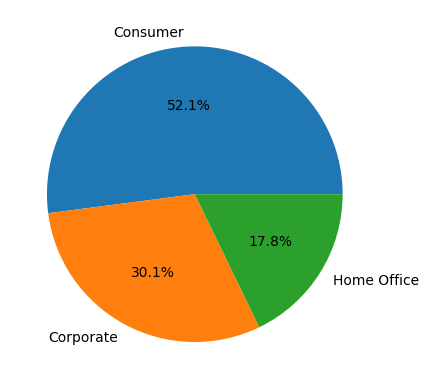

In [ ]:
plt.pie(number_of_customers["count"], labels=number_of_customers["Type Of Customers"], autopct="%1.1f%%")

  Type Of Customer   Total Sales
0         Consumer  1.148061e+06
1        Corporate  6.884941e+05
2      Home Office  4.249822e+05


<BarContainer object of 3 artists>

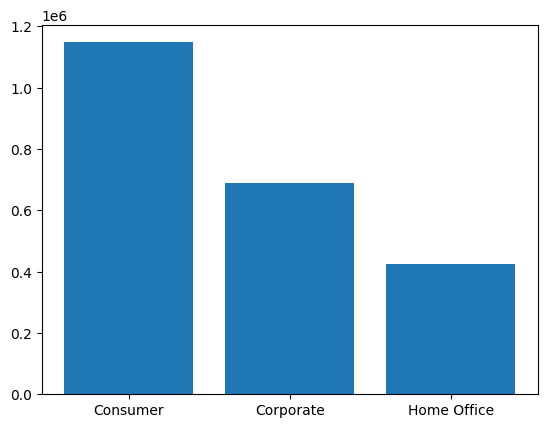

In [ ]:
sales_per_segment = df.groupby("Segment")["Sales"].sum().reset_index()
sales_per_segment = sales_per_segment.rename(columns={"Segment" : "Type Of Customer", "Sales" : "Total Sales"})

print(sales_per_segment)

plt.bar(sales_per_segment["Type Of Customer"], sales_per_segment["Total Sales"])

([<matplotlib.patches.Wedge at 0x7c074530d9d0>,
 [Text(-0.02642083976554102, 1.0996826538715994, 'Consumer'),
  Text(-0.5902005886829921, -0.9282581888236967, 'Corporate'),
  Text(0.913814451312435, -0.612326014940206, 'Home Office')],
 [Text(-0.014411367144840556, 0.5998269021117814, '50.8%'),
  Text(-0.3219275938270865, -0.5063226484492891, '30.4%'),
  Text(0.49844424617041905, -0.33399600814920327, '18.8%')])

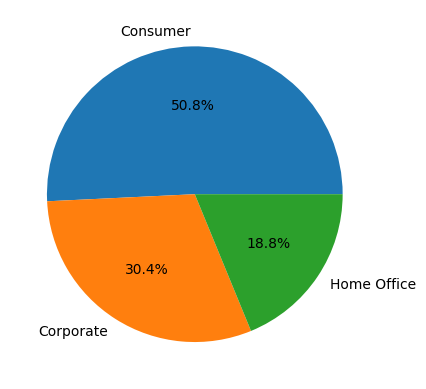

In [ ]:
plt.pie(sales_per_segment["Total Sales"], labels=sales_per_segment["Type Of Customer"], autopct="%1.1F%%")

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
customer_order_frequency = df.groupby(["Customer ID", "Customer Name", "Segment"])["Order ID"].count().reset_index()


In [ ]:
customer_order_frequency.rename(columns={"Order ID" : "Total Orders"}, inplace= True)

In [ ]:
repeat_customers = customer_order_frequency[customer_order_frequency["Total Orders"] >= 1]

In [ ]:
repeat_customers_sorted = repeat_customers.sort_values(by="Total Orders", ascending = False)

In [ ]:
print(repeat_customers_sorted.head(12).reset_index(drop=True))

   Customer ID        Customer Name      Segment  Total Orders
0     WB-21850        William Brown     Consumer            35
1     PP-18955           Paul Prost  Home Office            34
2     MA-17560         Matt Abelman  Home Office            34
3     JL-15835             John Lee     Consumer            33
4     CK-12205  Chloris Kastensmidt     Consumer            32
5     SV-20365          Seth Vernon     Consumer            32
6     JD-15895     Jonathan Doherty    Corporate            32
7     AP-10915       Arthur Prichep     Consumer            31
8     ZC-21910     Zuschuss Carroll     Consumer            31
9     EP-13915           Emily Phan     Consumer            31
10    LC-16870        Lena Cacioppo     Consumer            30
11    Dp-13240          Dean percer  Home Office            29


In [ ]:
customer_sales = df.groupby(["Customer ID", "Customer Name", "Segment"])["Sales"].sum().reset_index()

In [ ]:
top_spenders = customer_sales.sort_values(by="Sales", ascending= False)

In [ ]:
print(top_spenders.head(12).reset_index(drop=True))

   Customer ID       Customer Name      Segment      Sales
0     SM-20320         Sean Miller  Home Office  25043.050
1     TC-20980        Tamara Chand    Corporate  19052.218
2     RB-19360        Raymond Buch     Consumer  15117.339
3     TA-21385        Tom Ashbrook  Home Office  14595.620
4     AB-10105       Adrian Barton     Consumer  14473.571
5     KL-16645        Ken Lonsdale     Consumer  14175.229
6     SC-20095        Sanjit Chand     Consumer  14142.334
7     HL-15040        Hunter Lopez     Consumer  12873.298
8     SE-20110        Sanjit Engle     Consumer  12209.438
9     CC-12370  Christopher Conant     Consumer  12129.072
10    TS-21370        Todd Sumrall    Corporate  11891.751
11    GT-14710           Greg Tran     Consumer  11820.120


In [ ]:
shipping_model = df["Ship Mode"].value_counts().reset_index()
shipping_model = shipping_model.rename(columns={"count": "Use Frequency", "Ship Mode": "Mode Of Shipment"})
print(shipping_model)

  Mode Of Shipment  Use Frequency
0   Standard Class           5859
1     Second Class           1902
2      First Class           1501
3         Same Day            538
Index(['Mode Of Shipment', 'Use Frequency'], dtype='object')


([<matplotlib.patches.Wedge at 0x7c0744f4a3d0>,
 [Text(-0.3328682142840549, 1.0484267985507356, 'Standard Class'),
  Text(-0.3732753555364641, -1.0347296791670404, 'Second Class'),
  Text(0.7455146923475287, -0.8088311588298078, 'First Class'),
  Text(1.083680807320627, -0.18877475425732734, 'Same Day')],
 [Text(-0.18156448051857538, 0.5718691628458558, '59.8%'),
  Text(-0.20360473938352586, -0.5643980068183856, '19.4%'),
  Text(0.4066443776441065, -0.44118063208898606, '15.3%'),
  Text(0.5910986221748874, -0.102968047776724, '5.5%')])

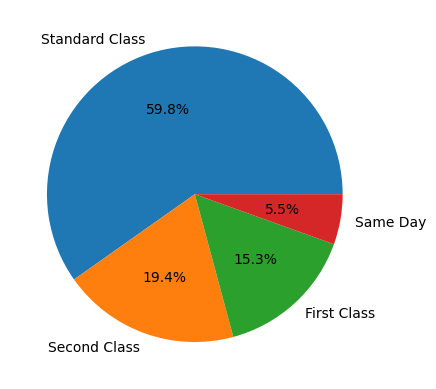

In [ ]:
plt.pie(shipping_model["Use Frequency"], labels=shipping_model["Mode Of Shipment"], autopct="%1.1f%%")

In [ ]:
state = df["State"].value_counts().reset_index()
state = state.rename(columns={"count": "Number Of Customers"})
print(state.head(20))

             State  Number Of Customers
0       California                 1946
1         New York                 1097
2            Texas                  973
3     Pennsylvania                  582
4       Washington                  504
5         Illinois                  483
6             Ohio                  454
7          Florida                  373
8         Michigan                  253
9   North Carolina                  247
10        Virginia                  224
11         Arizona                  223
12       Tennessee                  183
13        Colorado                  179
14         Georgia                  177
15        Kentucky                  137
16         Indiana                  135
17   Massachusetts                  135
18          Oregon                  122
19      New Jersey                  122


In [ ]:
city = df["City"].value_counts().reset_index()
print(city.head(15))

             City  count
0   New York City    891
1     Los Angeles    728
2    Philadelphia    532
3   San Francisco    500
4         Seattle    426
5         Houston    374
6         Chicago    308
7        Columbus    221
8       San Diego    170
9     Springfield    161
10         Dallas    156
11   Jacksonville    125
12        Detroit    115
13         Newark     92
14        Jackson     82


In [ ]:

state_sales = df.groupby(["State"])["Sales"].sum().reset_index()
top_sales = state_sales.sort_values(by="Sales", ascending=False)

In [ ]:
print(top_sales.head(10).reset_index(drop=True))

          State        Sales
0    California  446306.4635
1      New York  306361.1470
2         Texas  168572.5322
3    Washington  135206.8500
4  Pennsylvania  116276.6500
5       Florida   88436.5320
6      Illinois   79236.5170
7      Michigan   76136.0740
8          Ohio   75130.3500
9      Virginia   70636.7200


In [ ]:
city_sales = df.groupby(["City"])["Sales"].sum().reset_index()
top_city_sales = city_sales.sort_values(by="Sales", ascending=False)

In [ ]:
print(top_city_sales.head(10).reset_index(drop=True))

            City        Sales
0  New York City  252462.5470
1    Los Angeles  173420.1810
2        Seattle  116106.3220
3  San Francisco  109041.1200
4   Philadelphia  108841.7490
5        Houston   63956.1428
6        Chicago   47820.1330
7      San Diego   47521.0290
8   Jacksonville   44713.1830
9        Detroit   42446.9440


In [ ]:
products = df["Category"].unique()
print(products)

['Furniture' 'Office Supplies' 'Technology']


In [ ]:
products_subcategory = df["Sub-Category"].unique()
print(products_subcategory)

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [ ]:
subcategory_count = df.groupby("Category")["Sub-Category"].nunique().reset_index()
subcategory_count = subcategory_count.sort_values(by="Sub-Category", ascending = False)
print(subcategory_count)

          Category  Sub-Category
1  Office Supplies             9
0        Furniture             4
2       Technology             4


In [ ]:
subcategory_count_sales = df.groupby(["Category", "Sub-Category"])["Sales"].sum().reset_index()
subcategory_count_sales = subcategory_count_sales.sort_values(by="Sales", ascending = False)
print(subcategory_count_sales)

           Category Sub-Category        Sales
16       Technology       Phones  327782.4480
1         Furniture       Chairs  322822.7310
11  Office Supplies      Storage  219343.3920
3         Furniture       Tables  202810.6280
6   Office Supplies      Binders  200028.7850
15       Technology     Machines  189238.6310
13       Technology  Accessories  164186.7000
14       Technology      Copiers  146248.0940
0         Furniture    Bookcases  113813.1987
4   Office Supplies   Appliances  104618.4030
2         Furniture  Furnishings   89212.0180
10  Office Supplies        Paper   76828.3040
12  Office Supplies     Supplies   46420.3080
5   Office Supplies          Art   26705.4100
7   Office Supplies    Envelopes   16128.0460
9   Office Supplies       Labels   12347.7260
8   Office Supplies    Fasteners    3001.9600


In [ ]:
products_category = df.groupby(["Category"])["Sales"].sum().reset_index()
top_products_category = products_category.sort_values(by="Sales", ascending=False)
print(top_products_category)

          Category        Sales
2       Technology  827455.8730
0        Furniture  728658.5757
1  Office Supplies  705422.3340


([<matplotlib.patches.Wedge at 0x7c074501c350>,
 [Text(0.4498857223734124, 1.003794220348251, 'Technology'),
  Text(-1.0842321085760298, -0.18558215090028554, 'Furniture'),
  Text(0.6127880326006169, -0.9135046946247543, 'Office Supplies')],
 [Text(0.24539221220367946, 0.547524120189955, '36.6%'),
  Text(-0.5913993319505617, -0.1012266277637921, '32.2%'),
  Text(0.3342480177821546, -0.4982752879771386, '31.2%')])

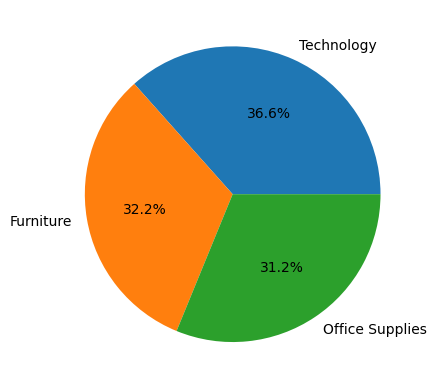

In [ ]:
plt.pie(top_products_category["Sales"], labels=top_products_category["Category"], autopct="%1.1f%%")

<BarContainer object of 17 artists>

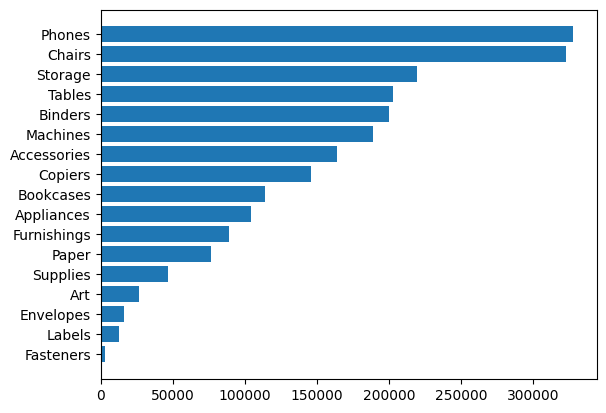

In [ ]:
subcategory_count_sales = subcategory_count_sales.sort_values(by="Sales", ascending = True)
plt.barh(subcategory_count_sales["Sub-Category"], subcategory_count_sales["Sales"])

In [ ]:
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst= True)
yearly_sales = df.groupby(df["Order Date"].dt.year)["Sales"].sum()
yearly_sales = yearly_sales.reset_index()
yearly_sales = yearly_sales.rename(columns={"Order Date": "Year", "Sales": "Total Sales"})

print(yearly_sales)

   Year  Total Sales
0  2015  479856.2081
1  2016  459436.0054
2  2017  600192.5500
3  2018  722052.0192


<BarContainer object of 4 artists>

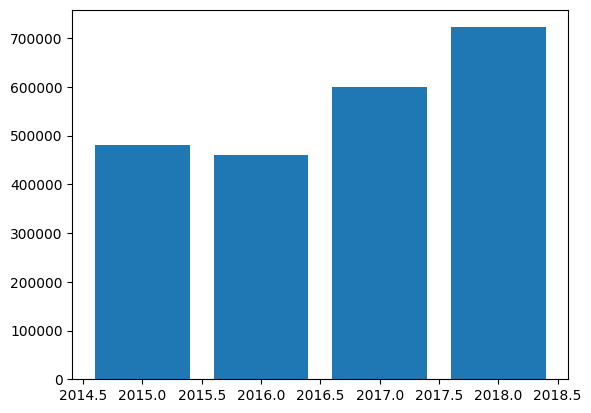

In [ ]:
plt.bar(yearly_sales["Year"], yearly_sales["Total Sales"])

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


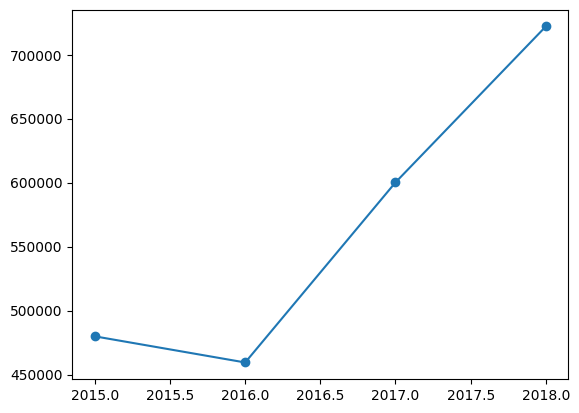

In [ ]:
plt.plot(yearly_sales["Year"], yearly_sales["Total Sales"], marker="o", linestyle="-")

In [ ]:
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst= True)
yearly_sales = df[df["Order Date"].dt.year == 2018]
quarterly_sales = yearly_sales.resample("Q", on="Order Date")["Sales"].sum()
quarterly_sales = quarterly_sales.reset_index()
quarterly_sales = quarterly_sales.rename(columns= {"Order Date": "Quater", "Sales": "Total Quaterly Sales"})
print(quarterly_sales)


      Quater  Total Quaterly Sales
0 2018-03-31           122260.8842
1 2018-06-30           127558.6200
2 2018-09-30           193815.8400
3 2018-12-31           278416.6750


<ipython-input-143-cf2287d3dd72>:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sales = yearly_sales.resample("Q", on="Order Date")["Sales"].sum()


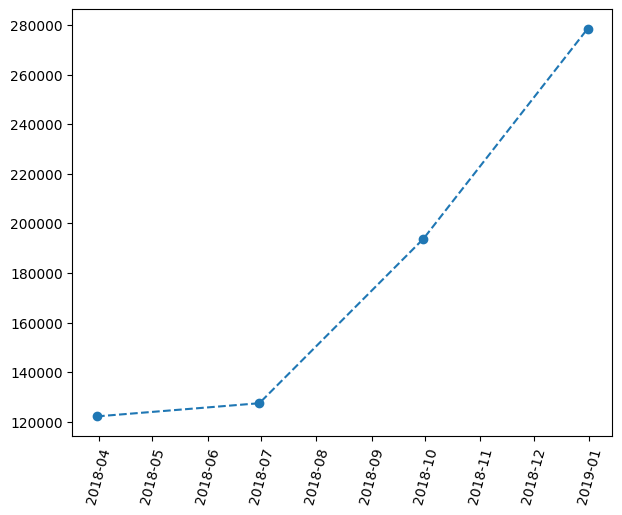

In [ ]:
plt.plot(quarterly_sales["Quater"], quarterly_sales["Total Quaterly Sales"], marker="o", linestyle="--")

plt.tight_layout()
plt.xticks(rotation=75)
plt.show()

In [ ]:
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst= True)
yearly_sales = df[df["Order Date"].dt.year == 2018]
monthly_sales = yearly_sales.resample("ME", on="Order Date")["Sales"].sum()
monthly_sales = monthly_sales.reset_index()
monthly_sales = monthly_sales.rename(columns= {"Order Date": "Month", "Sales": "Total Monthly Sales"})
print(monthly_sales)


        Month  Total Monthly Sales
0  2018-01-31           43476.4740
1  2018-02-28           19920.9974
2  2018-03-31           58863.4128
3  2018-04-30           35541.9101
4  2018-05-31           43825.9822
5  2018-06-30           48190.7277
6  2018-07-31           44825.1040
7  2018-08-31           62837.8480
8  2018-09-30           86152.8880
9  2018-10-31           77448.1312
10 2018-11-30          117938.1550
11 2018-12-31           83030.3888


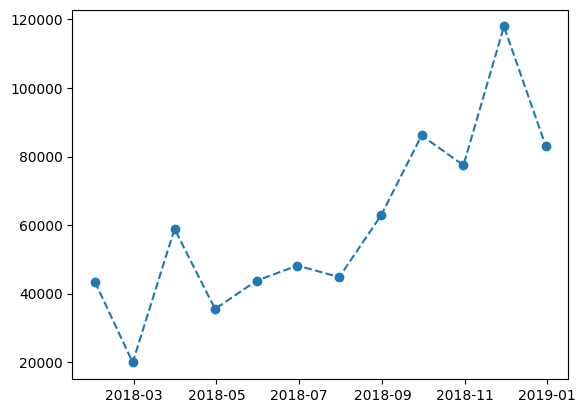

In [ ]:
plt.plot(monthly_sales["Month"], monthly_sales["Total Monthly Sales"], marker="o", linestyle="--")